In [263]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

In [264]:
bean = datasets.load_boston()
print bean.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [265]:
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)

In [286]:
X_train, X_test, y_train, y_test = load_boston()

In [287]:
X_train.shape

(379L, 13L)

In [288]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [289]:
zip (y_test, clf.predict(X_test))

[(20.800000000000001, 18.126535259985861),
 (11.300000000000001, 14.079041088645939),
 (16.199999999999999, 15.11498390983699),
 (12.699999999999999, 11.357934298756804),
 (27.5, 32.352220158928525),
 (6.2999999999999998, 11.575904198541323),
 (22.899999999999999, 19.325579668515449),
 (30.100000000000001, 34.120583320286435),
 (20.800000000000001, 23.708533336488706),
 (7.5, 13.129102714120128),
 (21.199999999999999, 21.217307555411878),
 (17.100000000000001, 16.860192000109677),
 (28.699999999999999, 30.275085209120853),
 (17.800000000000001, 8.3952146081953547),
 (19.399999999999999, 17.096269338570355),
 (19.600000000000001, 17.389906784149815),
 (42.799999999999997, 27.752222862613483),
 (20.899999999999999, 21.611401524369136),
 (18.5, 25.247772315280727),
 (30.800000000000001, 31.972114631054179),
 (50.0, 35.437519319387121),
 (20.600000000000001, 16.056853947586717),
 (29.100000000000001, 30.926459003925224),
 (23.800000000000001, 22.621065579588105),
 (14.5, 17.579473317196303

### R^2 score


In [290]:
r2_score(y_test, clf.predict(X_test))

0.73273066916163532

### MSE 

In [291]:
mean_squared_error(y_test, clf.predict(X_test))

26.384774651192807

### Lasso linear model 

In [292]:
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)
print("mse on test dara : %f" % mse_lasso)



Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.747488
mse on test dara : 24.927898


In [346]:
### calculating R^2 and MSE for different values of Alpha
i = 0
x = []
y = []
a = []
alpha = .1

while i <=10:
        alpha = alpha +.01
        a.append(alpha)
        lasso = Lasso(alpha=alpha)
        y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
        x.append(r2_score_lasso)
        mse_lasso = mean_squared_error(y_test, y_pred_lasso)
        y.append(mse_lasso)
        i=i+.01

### Plotting the Graphs for R^2 and MSE

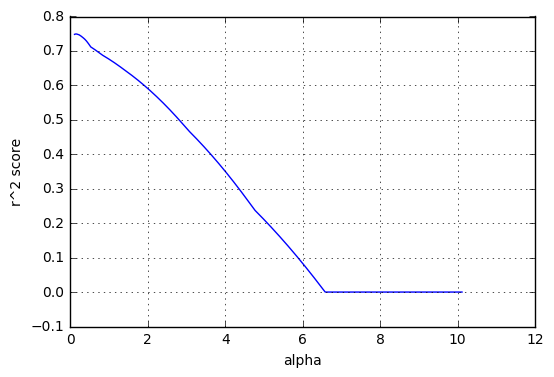

In [347]:
fig = plt.figure()
axes = fig.add_subplot(111)

axes.plot(a , x)
axes.set_xlabel('alpha')
axes.set_ylabel('r^2 score')

axes.grid()
plt.show()

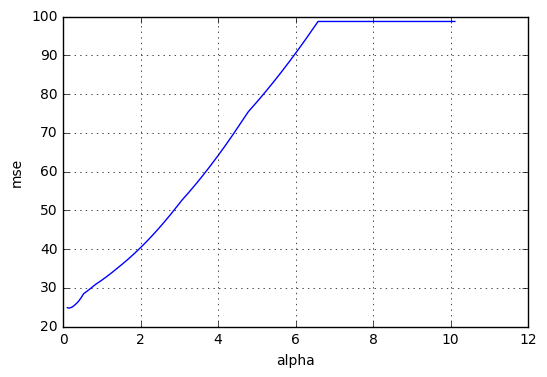

In [348]:
fig = plt.figure()
axes = fig.add_subplot(111)

axes.plot(a , y)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
axes.grid()
plt.show()

In [340]:
import math
sum(x)/len(x)

0.26738618594976554

In [341]:
sum(y)/len(y)

72.323488555281131

In [342]:
sum(a)/len(a)

5.109999999999932

In [343]:
max(x)

0.7492723245330275

In [344]:
max(y)

98.720417979929948

From both graphs we see that as the value of alpha increases R^2 score decreases whereas MSE increases. 
Hence, to get the optimal result I have selected the mean value of alpha, intersection of the two curves
(alpha = 3.25, not including values where r2 scre and mse becomes stagnant). 

In [345]:
alpha = 3.25
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)
print("mse on test dara : %f" % mse_lasso)

Lasso(alpha=3.25, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.446078
mse on test dara : 54.683104
